In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
MPa = 1e6
kW = 1e3
MW = 1e6

In [47]:
l = 0.15
avg_d = 1.25
density = 8000
F = 19.44*(10**(-4))
bettay = 75
E = 2 * 10**(11)
I = 1.43 * (10**(-8))
B = 60 * 1e-3
m = 8
delta = 5 * 1e-3
step = 25 * 1e-3
z = 84
n = 50
W = 0.19 * 1e-6

i = (I / F) ** 0.5
lamda = l / i

psi = 0.99

In [48]:
def to_dyn_freq(f, n=50):
    root = (1 + B_bandage * (n / f) ** 2) ** 0.5
    return f * root

def static_freq(n):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82 }
    return ((E * I) / (density * F)) ** 0.5 * psi * _m[n] / (l ** 2)

def epsilon_region(f, delta=0.05):
    return f * (1-delta), f * (1 + delta)

In [49]:
H = 1
J_b = B * (delta ** 3) / 12
k = (12 * (m - 1) * H * E * J_b * l * np.sin(np.deg2rad(bettay)) ** 2) / (m * step * I * E)
nu = B * delta * step / (F * l)

f = {'a0': static_freq(1) * 0.8,
    'a1': static_freq(1) * 6,
    'f1':static_freq(1) * 4.2,}

B_bandage = 0.5 * ((avg_d/l) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(bettay)) ** 2
B_bandage

6.301685099217912

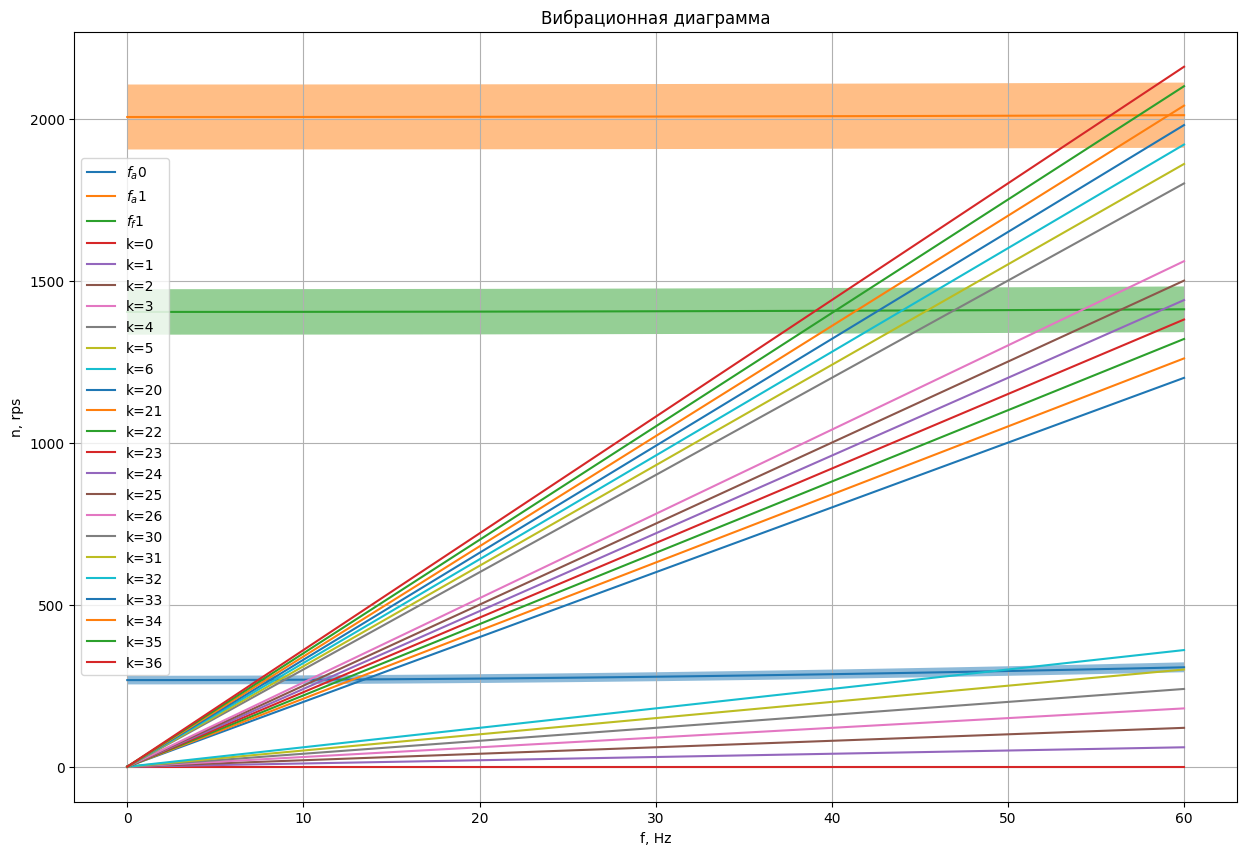

In [50]:
n_line = np.linspace(0, 60)

fig, ax = plt.subplots(1,1,figsize=(15,10))

for i in f:
    min_line, max_line = epsilon_region(to_dyn_freq(f[i], n=n_line))
    ax.plot(n_line, to_dyn_freq(f[i], n=n_line), label=f'$f_{i}$')
    ax.fill_between(n_line, y1=min_line, y2=max_line, alpha=0.5)

for i in [0,20,30]:
    for j in range(0,7):
        ax.plot(n_line, n_line * (i+j), label=f'k={i+j}')

ax.set_ylabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");

А0: опасными частотами являются от 49 Гц до 60 Гц и k от 5 до 6.

А1: опасными частотами являются от 51 Гц до 60 Гц и k от 23 до 26.

B0: опасными частотами являются от 35 Гц до 44 Гц и k от 31 до 36.

При таких соотношениях частот и k есть риск разрушения ротора.